### <center>students performance project

### Here we have a regression type project which deals with the  academical performance  of students.


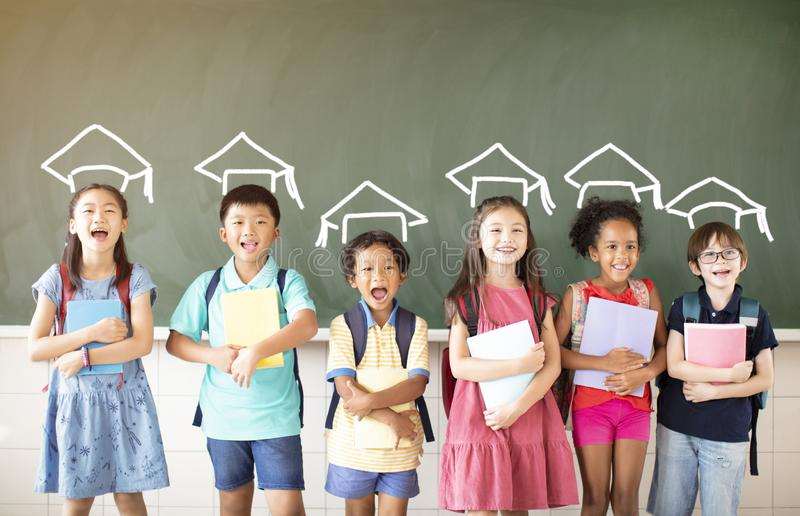

### Dataset description
    here we have  datas of around 1000 students from diffrent parental background.we are provided with their details like 
    gender,parental level education,reading score ,writting score,maths score ,lunch,test score.
    
  source:kaggle

### loading dependancies

In [1]:
import pandas as pd
import numpy as np
import klib as k
import matplotlib.pyplot as plt
import warnings 
from sklearn.preprocessing import LabelEncoder, StandardScaler
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import Lasso,LinearRegression,LogisticRegression,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('StudentsPerformance.csv') 

### EDA

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
351,male,group E,some college,standard,none,66,57,52
525,male,group E,some college,standard,none,68,60,59
171,male,group E,some high school,standard,none,94,88,78
694,female,group C,some high school,standard,none,49,63,56
459,male,group B,high school,standard,completed,72,65,68


In [6]:
df.shape

(1000, 8)

GridSpec(6, 5)

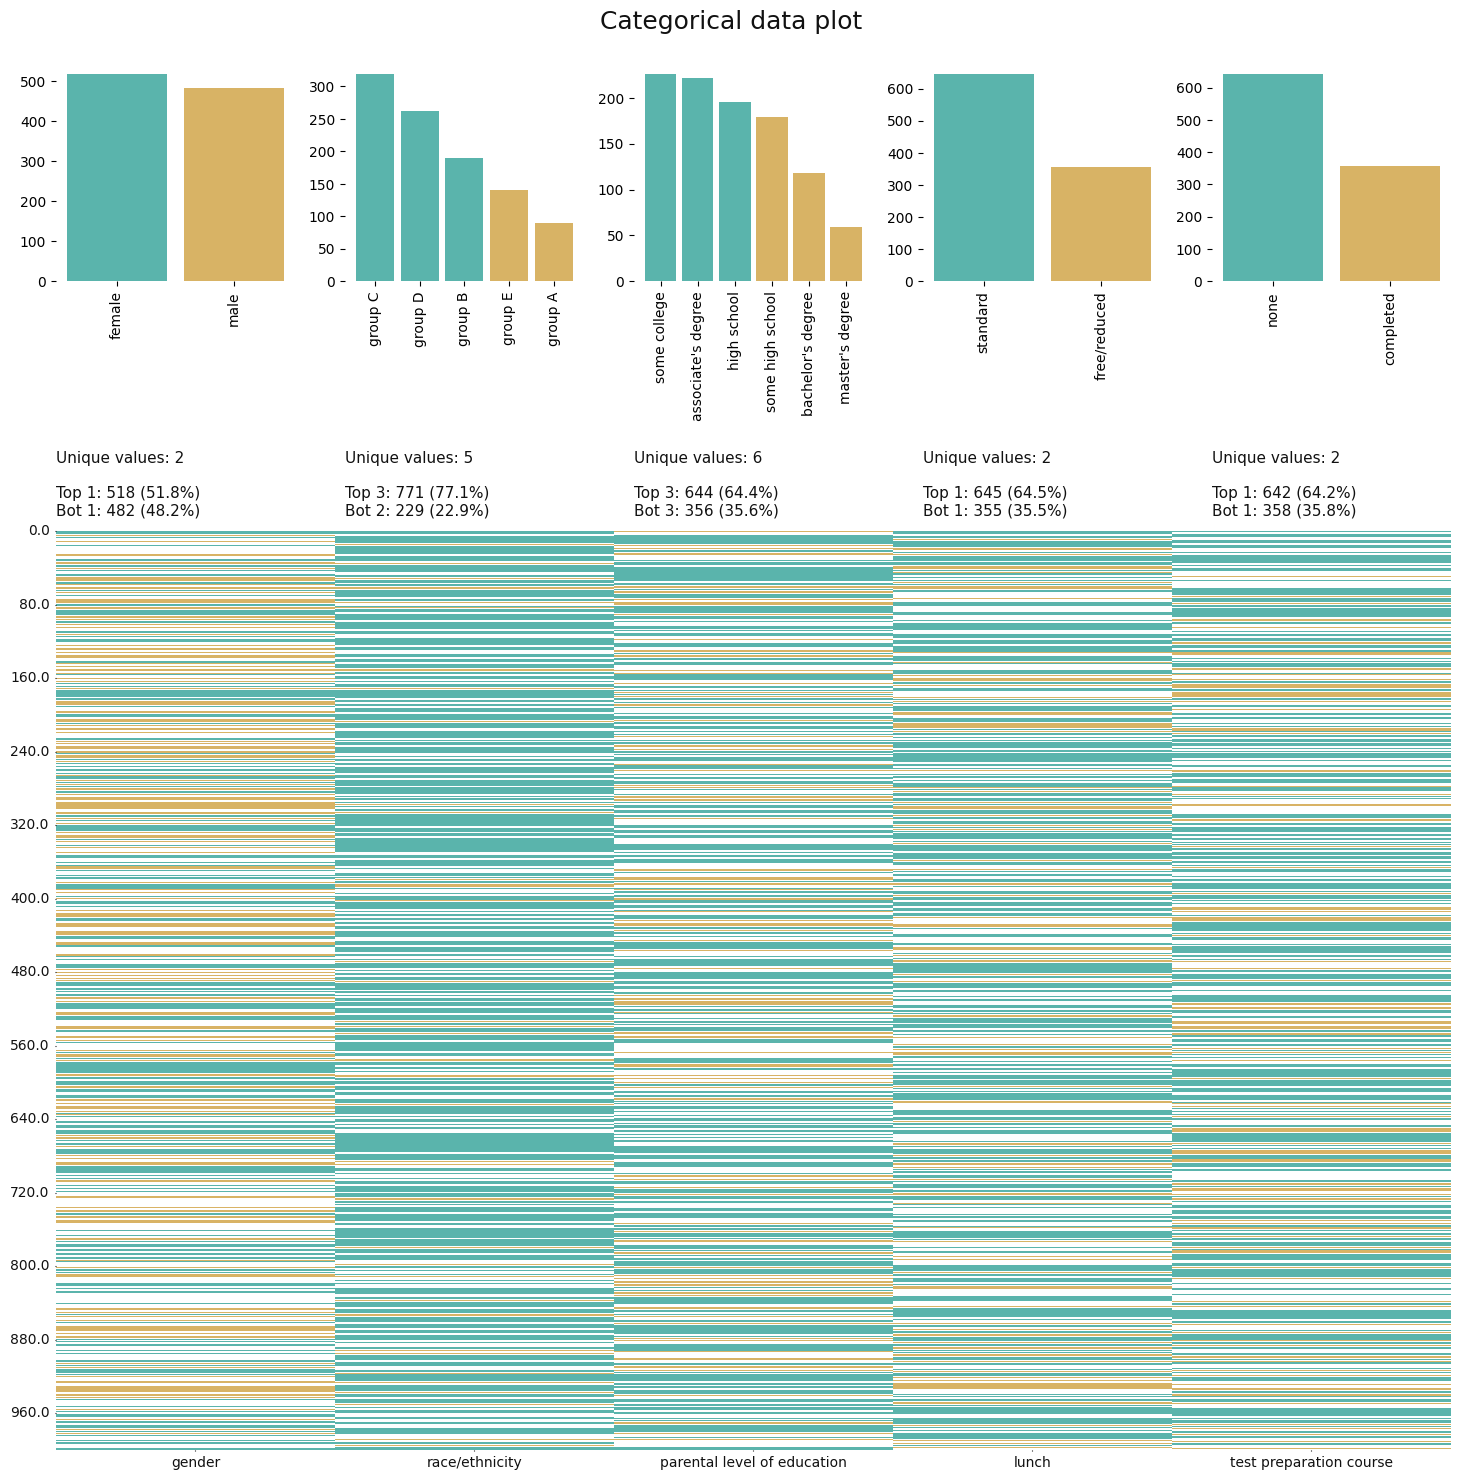

In [7]:
k.cat_plot(df)

In [8]:
df.size

8000

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
k.clean_column_names(df)

Long column names detected (>25 characters). Consider renaming the following columns ['parental_level_of_education'].


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [14]:
le=LabelEncoder()

In [15]:
for i in df.columns:
     if df[i].dtype =="object":
        df[i]=le.fit_transform(df[i])

### univariate analysis

### HISTOGRAM

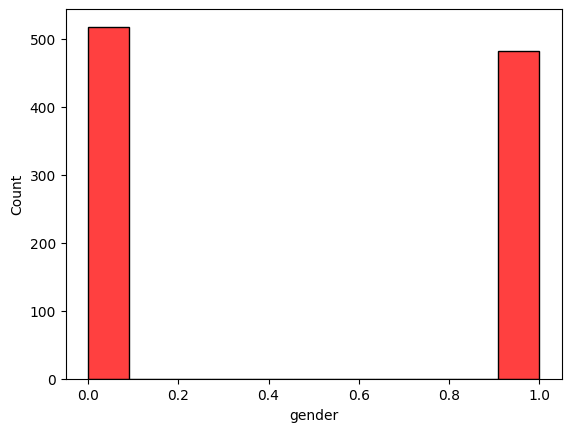

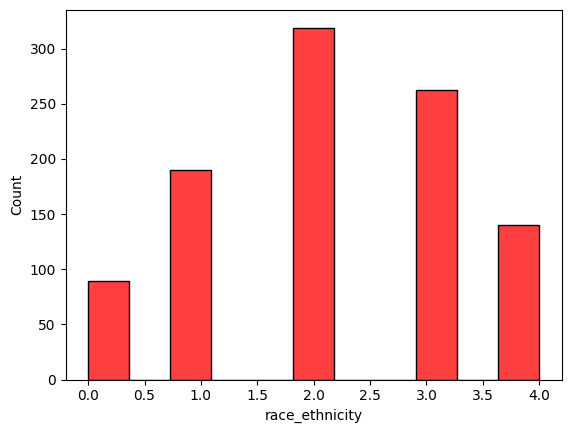

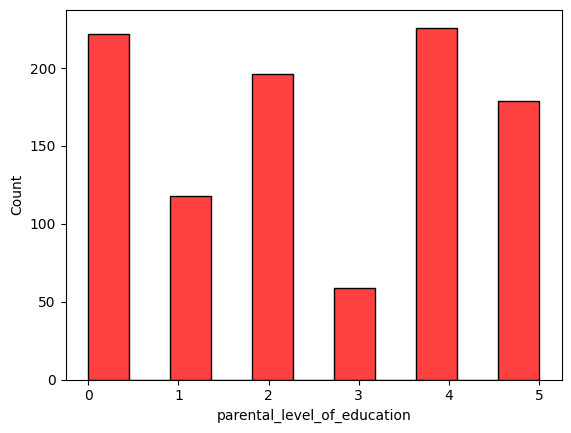

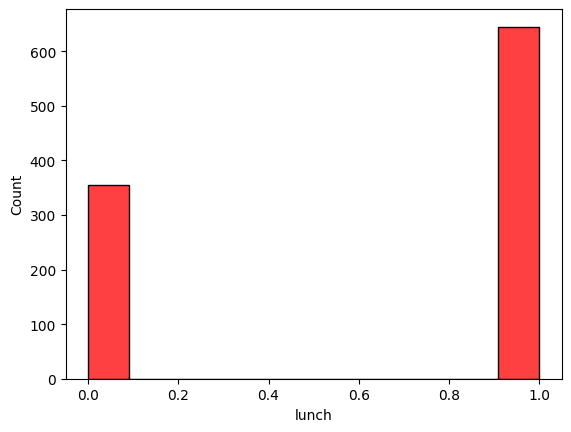

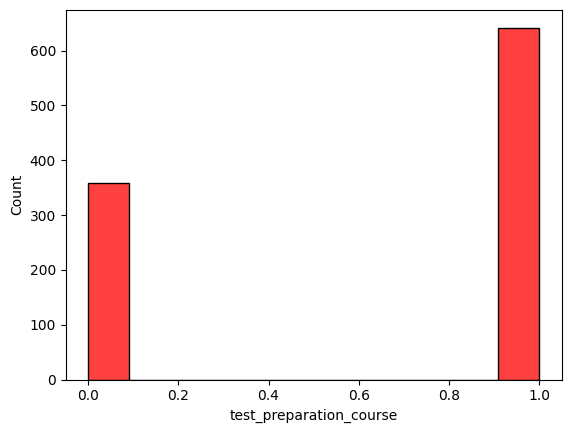

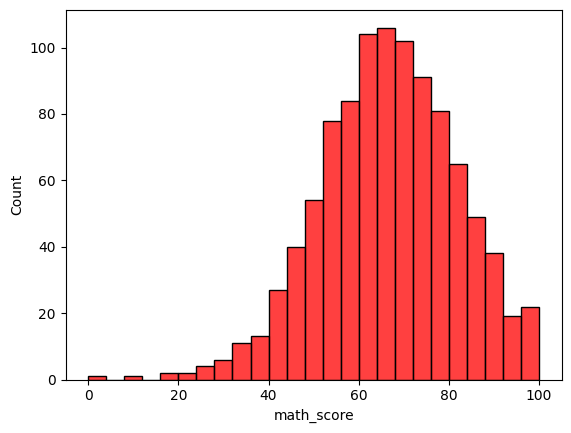

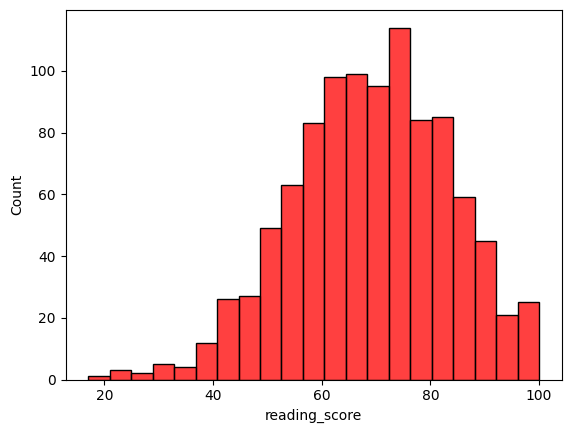

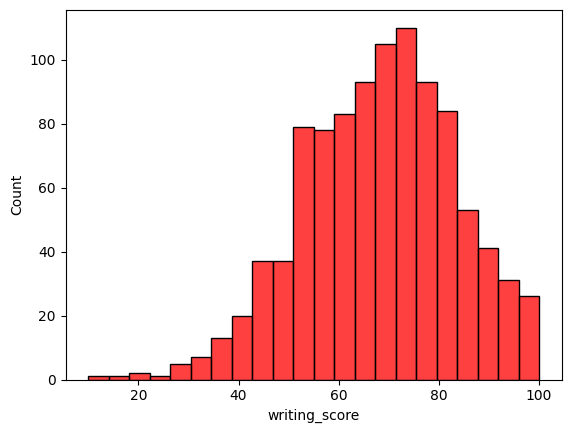

In [16]:
for i in  df.columns:
    if df[i].dtype != "object":
        sns.histplot(x=df[i],color="RED")
        plt.show()

### KDE PLOT

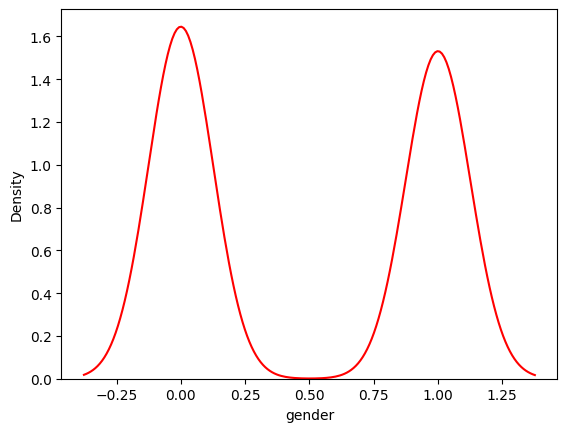

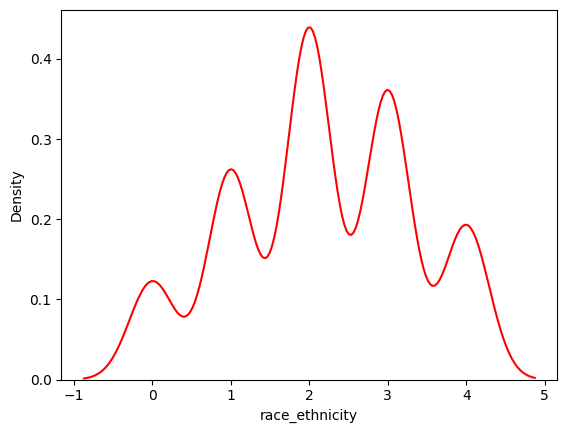

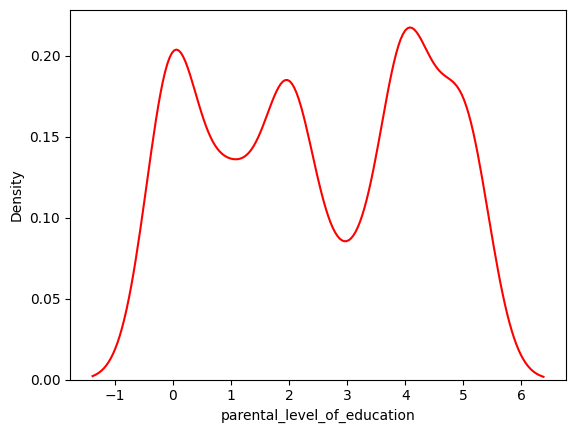

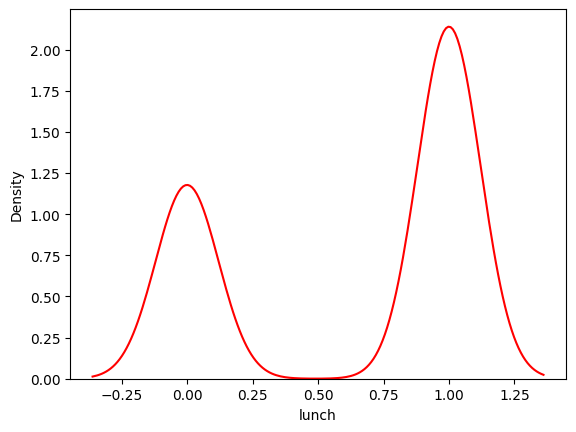

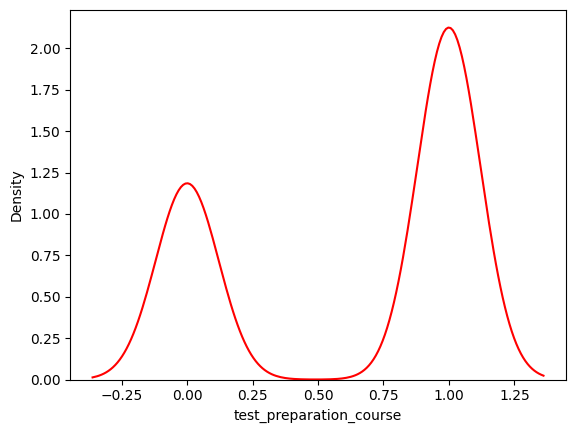

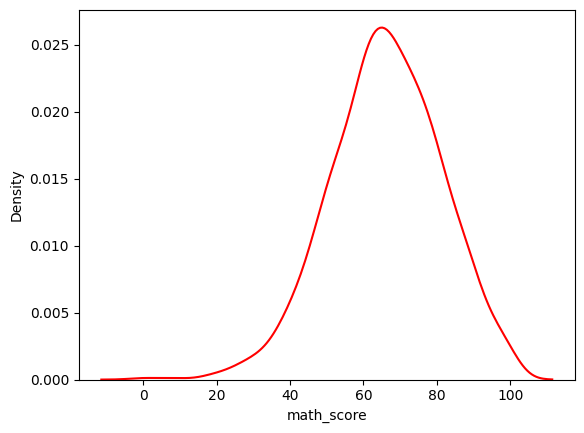

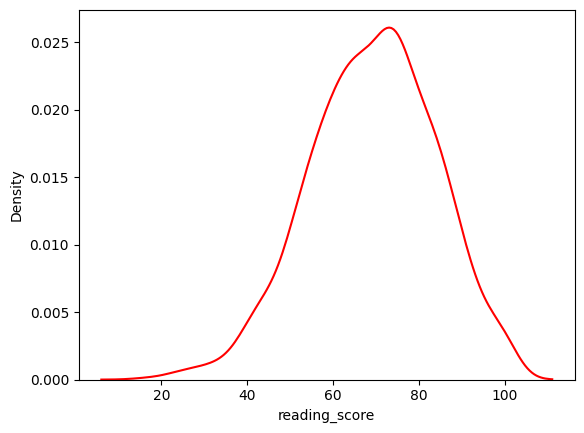

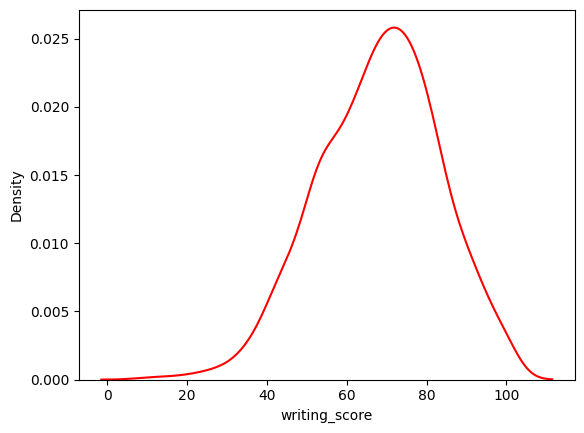

In [17]:
for i in  df.columns:
    if df[i].dtype != "object":
        sns.kdeplot(x=df[i],color="RED")
        plt.show()

REMOVING OUTLIERS

In [18]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL,LL


In [19]:
for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])


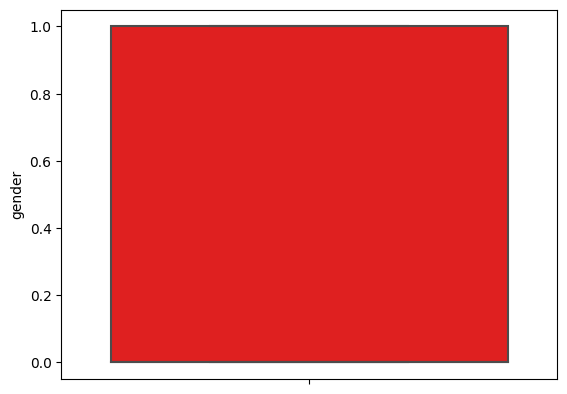

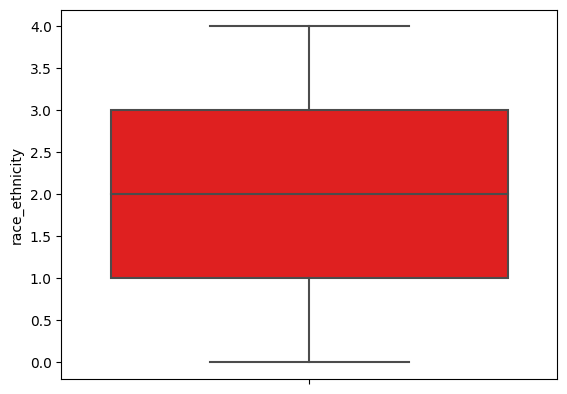

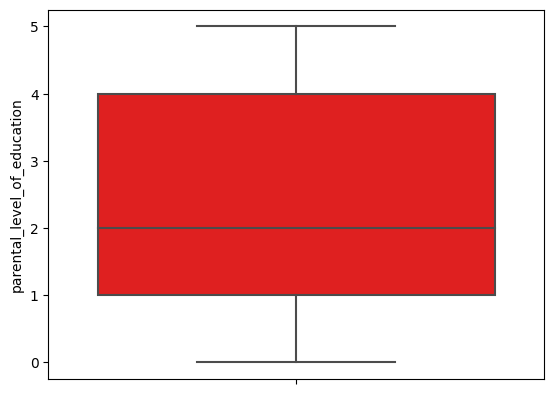

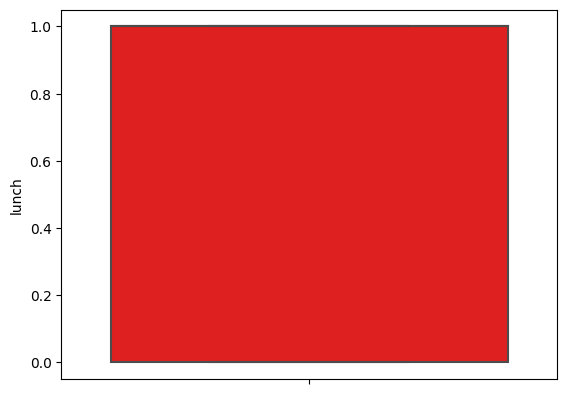

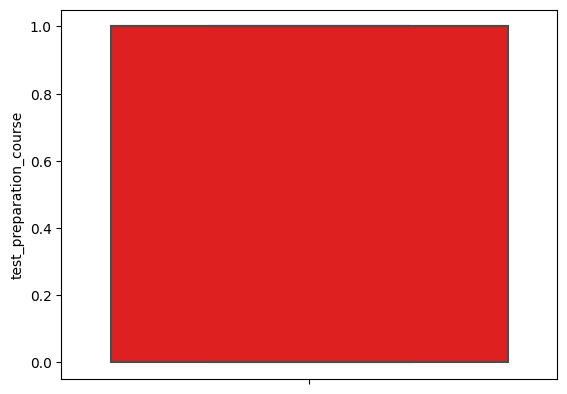

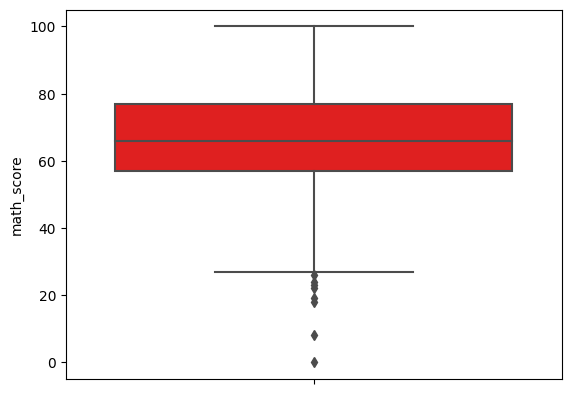

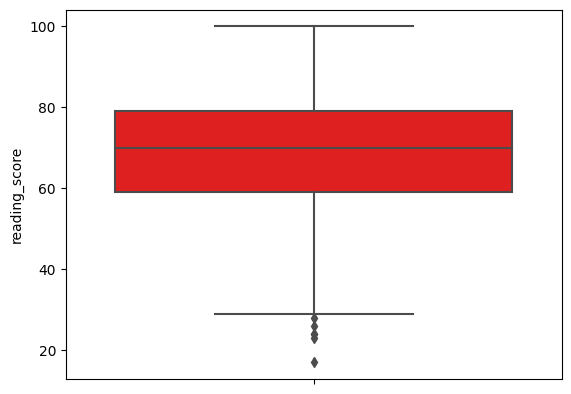

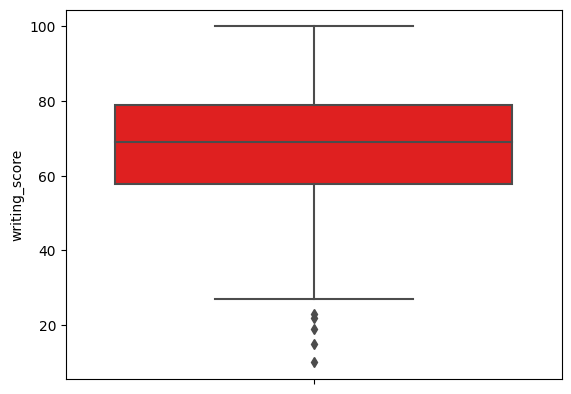

In [20]:
for i in  df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i],color="RED")
        plt.show();

In [21]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### HEAT MAP FOR FINDING CORRELATION

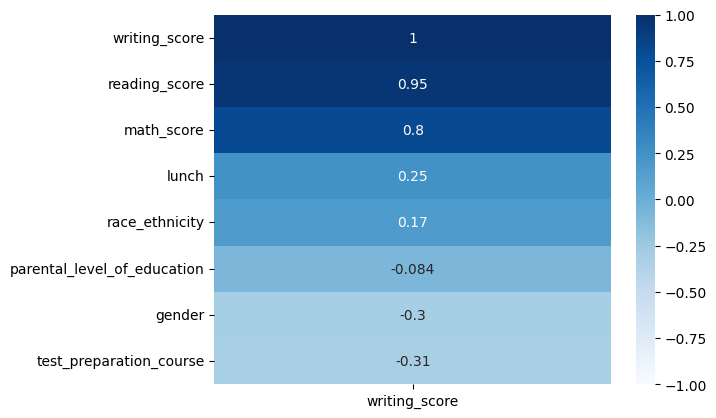

In [23]:
sns.heatmap(df.corr()[["writing_score"]].sort_values(by="writing_score", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues");

### model training

In [24]:
sc=StandardScaler()

In [25]:
x=df[["reading_score","math_score"]]

In [26]:
x=sc.fit_transform(x)

In [27]:
y=df[["writing_score"]]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
models={
    "linearregression":LinearRegression(),
    "ridge":Ridge(),
    "lasso":Lasso(),
    "decisiontreeregressor":DecisionTreeRegressor(),
    "randomforestregressor":RandomForestRegressor(random_state=0)
}


In [30]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with{}".format(name))
    training_score =model.score(x_train,y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score =r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse= mean_squared_error(y_test,model.predict(x_test))
    rmse= np.sqrt(mse)
    print("r2score: ",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("   "*105)

model trained withlinearregression
r2score:  92.65392813295749
training_score: 90.92400341995327
testing_score: 92.65392813295749
mae: 3.281593374380206
mse: 16.84583569977709
rmse_test: 4.104367880658006
                                                                                                                                                                                                                                                                                                                           
model trained withridge
r2score:  92.65579958414637
training_score: 90.92365419781514
testing_score: 92.65579958414637
mae: 3.282317189180489
mse: 16.84154413282558
rmse_test: 4.103845042496802
                                                                                                                                                                                                                                                                                             

### MODEL FITTING

In [31]:
model=Ridge()

In [32]:
model.fit(x_train,y_train)

Ridge()

In [33]:
y_pred = model.predict(x)

In [34]:
op=pd.DataFrame(zip(y.values,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)

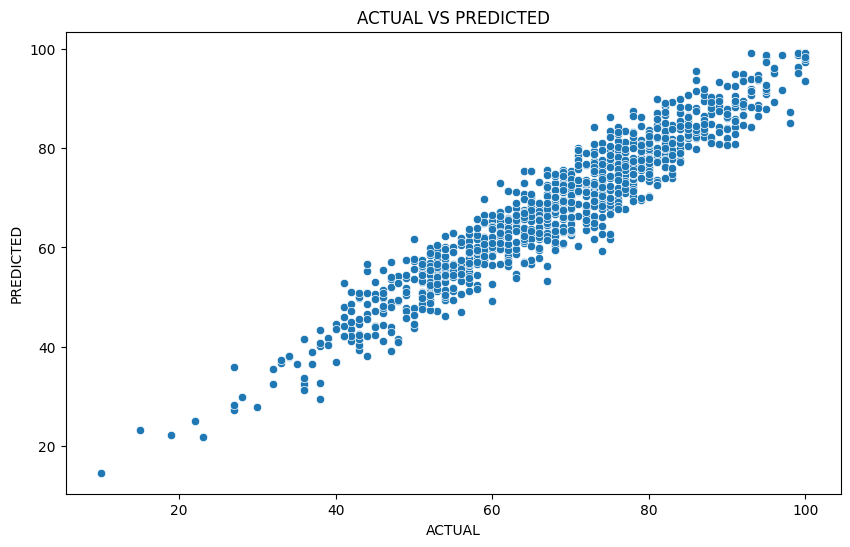

In [35]:
plt.figure(figsize=(10,6))
plt.title("ACTUAL VS PREDICTED")
sns.scatterplot(data=op,x='ACTUAL',y='PREDICTED');

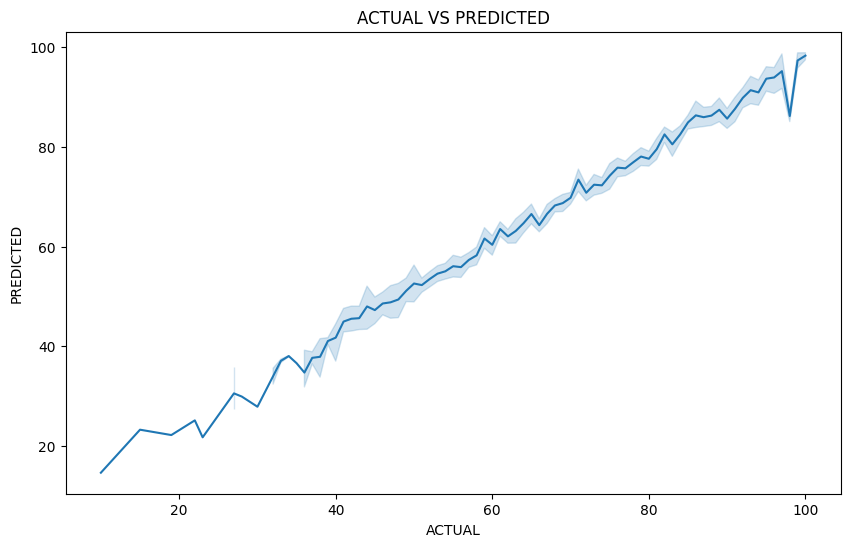

In [36]:
plt.figure(figsize=(10,6))
plt.title("ACTUAL VS PREDICTED")
sns.lineplot(data=op,x='ACTUAL',y='PREDICTED');

### here we can conclude that the students academical performance is majorly depends up on their reading and maths score .so we can say that ,if we improve their reading and mathematical skill wisely we can achieve good exellence in their academic performance 